<a href="https://colab.research.google.com/github/BenBlondeel-UCLL/Troy-ML/blob/master/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()

Checking the Sample and Target Sizes

In [ ]:
print(data.data.shape)
print(data.target.shape)

(569, 30)
(569,)


Splitting the Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=11)

Training and Testing Set Sizes

In [ ]:
X_train.shape

(426, 30)

In [ ]:
X_test.shape

(143, 30)

Create the model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

Training the Model

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

Predicting

In [ ]:
y_pred = nb.predict(X_test)

Estimator Method score

In [ ]:
score = nb.score(X_test, y_test)
print(f"Model score: {score}")

Model score: 0.951048951048951


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[44  6]
 [ 1 92]]


Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



Visualizing the Confusion Matrix

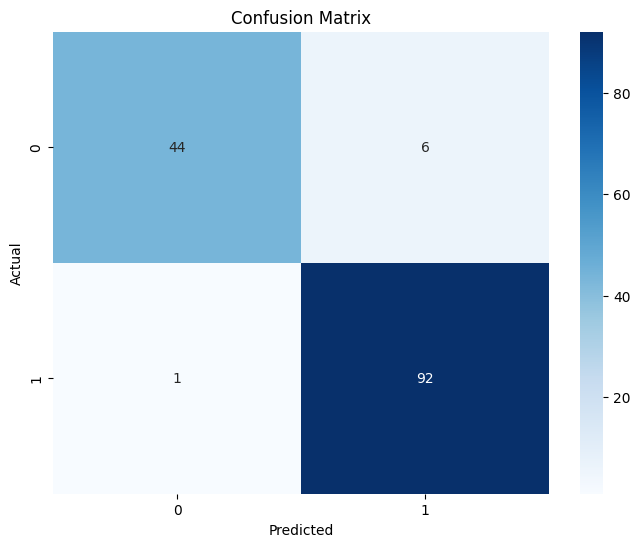

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the KFold object
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

# Perform cross-validation
scores = cross_val_score(estimator=nb, X=data.data, y=data.target, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean cross-validation score: 0.9384711779448622


Running Multiple Models to Find the Best One

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for name, model in estimators.items():
    scores = cross_val_score(estimator=model, X=data.data, y=data.target, cv=kfold)
    print(f"{name} cross-validation scores: {scores}")
    print(f"{name} mean cross-validation score: {scores.mean()}")

GaussianNB cross-validation scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
GaussianNB mean cross-validation score: 0.9384711779448622
KNeighborsClassifier cross-validation scores: [0.92982456 0.94736842 0.89473684 0.92982456 0.92982456 0.94736842
 0.89473684 0.94736842 0.94736842 0.91071429]
KNeighborsClassifier mean cross-validation score: 0.9279135338345865
LogisticRegression cross-validation scores: [0.98245614 0.9122807  0.89473684 0.96491228 1.         0.94736842
 0.96491228 0.92982456 0.94736842 0.96428571]
LogisticRegression mean cross-validation score: 0.950814536340852
SVC cross-validation scores: [0.96491228 0.89473684 0.85964912 0.94736842 0.9122807  0.92982456
 0.85964912 0.94736842 0.94736842 0.92857143]
SVC mean cross-validation score: 0.9191729323308271
